<a href="https://colab.research.google.com/github/SeanNassimiha/Citadel-Data-Open-Investment-Without-Displacement/blob/main/MNIST_training_on_noisyImg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 - Adding Random Noise to MNIST Data-Set
## Sean Nassimiha, 29-10-2020

Within this notebook, we will implement a neural network to distinguish between the digits in the MNIST database. We will use a simple neural network with 2 hidden layers, and most importantly we will add a normal distribution of noise to every pixel within each image. 


In [1]:
#importing usual modules
import matplotlib.pyplot as plt
import numpy as np
import math

#importing tensorflow and keras
import tensorflow as tf
from tensorflow import keras

#importing image resolution
import matplotlib as mpl  
mpl.rcParams['figure.dpi']=200 # dots per inch

#Displaying tf version
print(tf.__version__)

2.3.0


## Preparing the data set

We will here import the MNIST database


In [2]:
mnist = keras.datasets.mnist   #The original handwritten digit MNIST

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Plotting the shapes and lengths of the train and test databases for reference (and as a sanity check)

In [3]:
print("Shape of training images:",train_images.shape)
print("Length of training set labels:",len(train_labels))
print("Shape of testing images:",test_images.shape)
print("Length of testing set labels:",len(test_labels))

Shape of training images: (60000, 28, 28)
Length of training set labels: 60000
Shape of testing images: (10000, 28, 28)
Length of testing set labels: 10000


Normalising the pixel values so they are between 0 and 1

In [4]:
train_images=train_images/255.0
test_images=test_images/255.0

## Adding Noise

Here we are are adding noise to every pixel in the series of images from the MNIST database that are input. 

What is the point of adding noise? 

Adding noise to train images is essential to avoid overfitting. By adding noise to train images we are making sure that our model does not rely too much on any individual pixel, and does not overfit the existing dataset. This is of paramount importance, and failure to training a model in such a way could lead to notable errors, such as the famous "one pixel attacks" that are able to completely fool a neural network by changing just one pixel in the whole image. 

Adding noise to test images on the other hand is useful to understand effectively how the neural network will behave "in the real world", when dealing with typologies of pictures different from the one in the original dataset, which might have themselves a certain amount of noise.

In [5]:
def mnist_noise(images, y_noise):
    """
    function that adds random noise to every pixel of the MNIST images inputted.
    The noise is drawn from a uniform distribution from 0 to y_noise where y_noise ia a configurable parameter
    
    input:
    images - the MNIST images to add noise to
    y_noise - the noise parameter for the distribution
    
    output:
    noisy_images - the immage with added noise"""
    
    images_noisy = images + y_noise * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    
    return images_noisy

Here a function from the notebook "Week3_MNIST_TF.ipynb" from the lectures was pasted to display N of the digits in the new, noisy, database. 

In [6]:
def display_image_array(whichImg):  
  '''
  Function that displays a range of images "whichImg" of the MNIST database. 
  '''
  #sets the number of columns, for both a square and rectangular case
  numcols=int(math.sqrt(len(whichImg)))
  if numcols*numcols < len(whichImg):
      numcols=numcols+1
  #initialising the final array  
  BigImage=np.zeros([28*numcols,28*numcols])
  #inserting the MNIST digits in the array
  for j in range(len(whichImg)):
      x=(j%numcols)*28
      y=int(j/numcols)*28
      BigImage[x:x+28,y:y+28]=show_noise[whichImg[j]]
  #plotting the digits   
  plt.imshow(BigImage,interpolation='nearest', cmap='binary')
  plt.axis('off')
  plt.show()

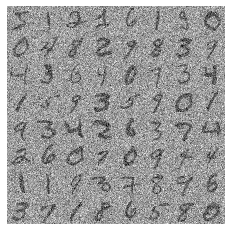

In [14]:
show_noise = mnist_noise(train_images, y_noise = 0.4) #adding noise to the train_images database

whichImg=range(64)
display_image_array(whichImg) #displaying all the noisy images

As it can be seen, at this noise value the digits are still clearly visible, even though the noise is considerable. 

## Model Creation

Below, we will create the model. In this case, a very simple model was used, in order to allow for more iteration of noise values to be tried. A simple [1,32,10] network was enough to obtain a high enough accuracy for this notebook. Indeed, we are not very interested in maximising accuracy but rather we just want to  study the effect of noise addition.

In [8]:
#defining a sequential model in keras, with 32 nodes in the first layer and 10 nodes in the outer layer (to distinguish between 10 digits)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #flattening the input image into a 1D array for the network
    keras.layers.Dense(32,activation='relu'), #setting the hidden layer with relu activ. fun. and 32 nodes
    keras.layers.Dense(10) #final layer with 10 nodes to accomodate 10 possible outputs
])

A sparse categorical cross entropy was used as loss function, and an Adam optimizer was chosen. 

In [9]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])

The model was here trained on images with noise = 0. We will show later that training with noise will actually increase the accuracy in the test_images. 

In [10]:
history=model.fit(train_images, train_labels,batch_size=100, epochs=10) #training the model

Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.4812 - accuracy: 0.8698
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2464 - accuracy: 0.9308
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1977 - accuracy: 0.9448
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1694 - accuracy: 0.9520
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1504 - accuracy: 0.9578
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1351 - accuracy: 0.9617
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1234 - accuracy: 0.9643
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1133 - accuracy: 0.9670
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1050 - accuracy: 0.9697
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0986 - accuracy: 0.9714

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2) #testing the accuracy


313/313 - 0s - loss: 0.1204 - accuracy: 0.9643


The required minum 95% accuracy was therefore obtained. 

In the next cell, the model trained without noise was evaluated on the test set to which normal noise was added. A curve for Accuracy vs Test-noise was plotted, and it clearly shows how the models has a strong decrease in accuracy as the noise in the test images increases. 

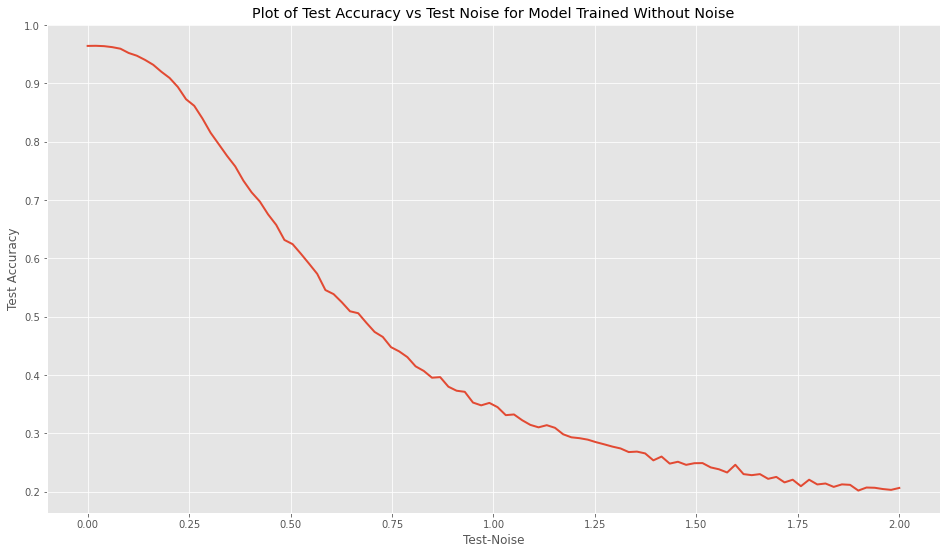

In [12]:
y_noise = np.linspace(0,2,100) #setting steps for different test noises
test_accuracy = []

for i in y_noise: #iterating over all test noises
  
  noisy_test = mnist_noise(test_images, i) #generating new test images
  test_loss, test_acc = model.evaluate(noisy_test, test_labels, verbose=0) #evaluating the model
  test_accuracy.append(test_acc) #creating the vector with the different accuracy values

#setting an image style
plt.style.use('ggplot')

#plotting the figure
fig,ax=plt.subplots(figsize=(16,9))
ax.set_xlabel("Test-Noise")
ax.set_ylabel("Test Accuracy")
ax.set_title('Plot of Test Accuracy vs Test Noise for Model Trained Without Noise')

ax.plot(y_noise, test_accuracy, linewidth=2)

So how can we ensure that our model does not become completely unreliable when working on noisy images? That's where training on noisy data comes in handy.

## Training on Noisy Images

Below a code was written for training the neural network on noisy images, with 11 different noises levels ranging from 0 to 2, and then evaluating each of these models again on noisy images with noises levels ranging from 0 to 2. 
Below we will discuss the results.



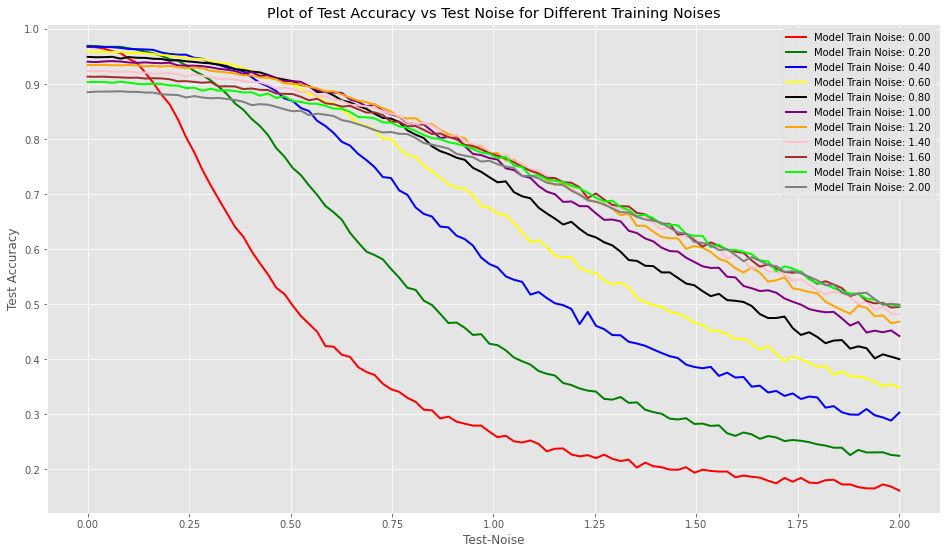

In [13]:
def training_noise(noise):
  '''
  Function that executes: 
  1) image noise implementation
  2) model compiling
  3) model fitting
  with the noise level as an input
  '''
  noisy_train = mnist_noise(train_images, noise) #creating the noisy images
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])
  history=model.fit(noisy_train, train_labels,batch_size=100, epochs=10, verbose=0) #training the model on the noisy images

  return history

#creating the final plot by training and evaluating the models

train_noise = np.linspace(0,2,11) #setting steps for different train noises
fig,ax=plt.subplots(1,1, squeeze=False, figsize=(16,9)) #creating the figure for the different curves.

colors = ['red', 'green', 'blue', 'yellow','black', 'purple', 'orange', 'pink','brown', 'lime', 'gray'] #setting the colour scale to distinguish well between the curves

for i, noise in enumerate(train_noise): #iterating both on the different train noises and their count "i"

  history = training_noise(noise) #using the previously defined function
  test_noise = np.linspace(0,2,100) #creating the test_noise array
  test_accuracy = []

  for j in test_noise: #iterating over the test noises
    
    #creating noisy test images and then evaluating on them
    noisy_test = mnist_noise(test_images, j)
    test_loss, test_acc = model.evaluate(noisy_test, test_labels, verbose=0)
    test_accuracy.append(test_acc)
  
  #plotting the final image comparing the different curves  
  ax[0,0].plot(test_noise, test_accuracy, linewidth=2, color= colors[i], label="Model Train Noise: {:.2f}".format(noise))
  ax[0,0].set_xlabel("Test-Noise")
  ax[0,0].set_ylabel("Test Accuracy")
  ax[0,0].legend()
  ax[0,0].set_title('Plot of Test Accuracy vs Test Noise for Different Training Noises')


### Results and Discussion

By looking at the different curves, the difference between training the model on no-noise and on noise is striking. 

In the interval where the test noise is low, the models trained on no/low noise have higher accuracy, as expected. The model was indeed able to train on clean images, and thus performs extremely good on clean images. 

As the noise increases, however, the models trained o n low noises drastically drop in accuracy. On the other hand, the models trained with noise keep performing really good, and the accuracy does not drop as steeply. 

When deciding which model to use, many factors must be considered:

- What does the set of real-world images look like?  
Of course if the model will be used for fully clear and clean images, then it should not be trained on a noisy dataset, as it is useless and it will simply hinder the efficiency of the model. But that's not a common thing, and most of the times in the real world data will be noisy. 

- What accuracy is needed for this application?
Again, understanding the possible real-world set of data is essential to the choice of model. By looking at the cell above that shows the digits with different noise levels, one can notice that:
 -  Noise levels [0, 0.9]: the digits can be easily distinguished by a human. Such images could be actual images in a real world database, and therefore the model should be able to easily indentify digits in this interval.
 - Noise levels [1, 1.5]: a human would struggle to distinguish the digits. The AI will most likely not encounter such noisy images, and therefore being able to have a high accuracy would be interesting but not essential. 
 - Noise levels [1.6, 2]: human would not be able to distinguish between such digits. AI will never have to work with such level of noise, and so objetively there is no need to ensure high accuracy in this interval. 

By keeping these considerations in mind, my choice of best model is for the Purple Curve, at $training-noise = 1.0$. This curve clearly performs sufficiently well in the no-noise state, at a level that is very close to those trained on non-noisy images. Unlike those, however, the model effectively copes with an increasing test noise. 
This was my personal choice of model, which takes into consideration my expectations of a possible real-world dataset to work on, however this choice might drastically vary based on the specific application. 